In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from keras.layers import Dense, LSTM

In [4]:
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2021-02-01')

In [5]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.100164
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111
...,...,...,...,...,...,...
2021-01-26,144.300003,141.369995,143.600006,143.160004,98390600.0,142.946396
2021-01-27,144.300003,140.410004,143.429993,142.059998,140843800.0,141.848038
2021-01-28,141.990005,136.699997,139.520004,137.089996,142621100.0,136.885452


In [6]:
df.shape

(1532, 6)

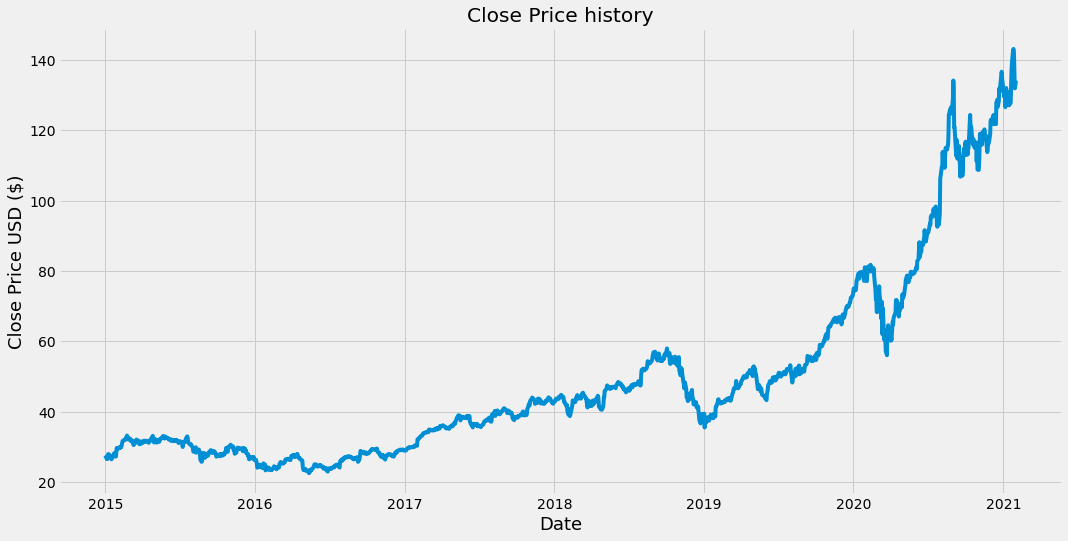

In [7]:
plt.figure(figsize=(16,8))
plt.title('Close Price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [8]:
data = df.filter(['Close'])
dataset = data.values
#convert numpy array, num of rows to train model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1226

In [9]:
#scale preprocessing trnsform norm bf neural ntwork
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0415509 ],
       [0.03937384],
       [0.03298777],
       ...,
       [0.94965783],
       [0.90711179],
       [0.92519176]])

In [10]:
#create training dataset
#create scaled trainng dataset
train_data = scaled_data[0:training_data_len, :]
#Split x_train and y_trainin data set
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()
    

[array([0.0415509 , 0.03937384, 0.03298777, 0.03300851, 0.03609787,
       0.04468174, 0.04493055, 0.03920797, 0.04121917, 0.04034834,
       0.03416961, 0.03244869, 0.03810907, 0.03982999, 0.04573918,
       0.04694175, 0.04719055, 0.03897989, 0.05177276, 0.05921626,
       0.05560856, 0.05865644, 0.05869791, 0.0605847 , 0.0613726 ,
       0.05927846, 0.06091645, 0.06568526, 0.07161518, 0.07489115,
       0.07617666, 0.07773171, 0.07957703, 0.07901721, 0.08119428,
       0.08845118, 0.08673025, 0.07972216, 0.0831018 , 0.07903796,
       0.08034418, 0.08090401, 0.07920381, 0.07478749, 0.07518142,
       0.07630106, 0.07084803, 0.06614141, 0.07072361, 0.06894049,
       0.07176031, 0.07609372, 0.07905868, 0.07704749, 0.07373005,
       0.0764462 , 0.07536804, 0.06850508, 0.0702882 , 0.06823554])]
[0.07470455119388392]

[array([0.0415509 , 0.03937384, 0.03298777, 0.03300851, 0.03609787,
       0.04468174, 0.04493055, 0.03920797, 0.04121917, 0.04034834,
       0.03416961, 0.03244869, 0.03

In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
#reshape (LSTM expects 3d in certain forms)
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1166, 60, 1)

In [13]:
#build lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
model.compile(optimizer='adam',loss='mean_squared_error')
#improve upon loss, how well it did

In [15]:
model.fit(x_train,y_train,batch_size=1, epochs=1)

1166/1166 [==============================] - 16s 12ms/step - loss: 0.0010


In [16]:
training_data_len

1226

In [44]:
test_data = scaled_data[training_data_len - 60:, :]
#create datasets x_test, y_test
x_test = []
y_test = dataset[training_data_len:, :]
#^predict model
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test
    

[array([0.24884926, 0.25357661, 0.25320341, 0.23284263, 0.24082522,
        0.2359942 , 0.23883475, 0.24605016, 0.24549037, 0.23918722,
        0.24642339, 0.25490358, 0.25486211, 0.25674891, 0.2619946 ,
        0.27628031, 0.27524361, 0.26624507, 0.26862947, 0.27028819,
        0.27458014, 0.2708273 , 0.2641302 , 0.26618287, 0.26402652,
        0.27097242, 0.26860875, 0.26639023, 0.27706821, 0.27835371,
        0.2666805 , 0.27053702, 0.28337133, 0.28347501, 0.27795976,
        0.28341281, 0.2897574 , 0.30244662, 0.30174164, 0.3006013 ,
        0.29863154, 0.30051834, 0.30286129, 0.31136221, 0.31022186,
        0.31689818, 0.31772755, 0.32394775, 0.32906905, 0.31712625,
        0.31706405, 0.32846774, 0.34310596, 0.34658925, 0.34582211,
        0.34605015, 0.3505909 , 0.35206306, 0.35633425, 0.35583659]),
 array([0.25357661, 0.25320341, 0.23284263, 0.24082522, 0.2359942 ,
        0.23883475, 0.24605016, 0.24549037, 0.23918722, 0.24642339,
        0.25490358, 0.25486211, 0.25674891, 0.

In [45]:
#convert the data into numpy array
x_test = np.array(x_test)

In [46]:
#reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [47]:
#get the predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 65.16268 ],
       [ 65.50846 ],
       [ 65.76839 ],
       [ 66.03492 ],
       [ 66.310776],
       [ 66.54217 ],
       [ 66.64352 ],
       [ 66.62975 ],
       [ 66.54437 ],
       [ 66.546   ],
       [ 66.54048 ],
       [ 66.627144],
       [ 66.74105 ],
       [ 66.779594],
       [ 66.64938 ],
       [ 66.49703 ],
       [ 66.44534 ],
       [ 66.58996 ],
       [ 66.73262 ],
       [ 66.90495 ],
       [ 67.13598 ],
       [ 67.39445 ],
       [ 67.73973 ],
       [ 68.22218 ],
       [ 68.74712 ],
       [ 69.22584 ],
       [ 69.63641 ],
       [ 69.94883 ],
       [ 70.29257 ],
       [ 70.6219  ],
       [ 71.05884 ],
       [ 71.505745],
       [ 71.95899 ],
       [ 72.42431 ],
       [ 73.02556 ],
       [ 73.55977 ],
       [ 74.06662 ],
       [ 74.464165],
       [ 74.88651 ],
       [ 75.44703 ],
       [ 76.0427  ],
       [ 76.776   ],
       [ 77.39079 ],
       [ 77.84141 ],
       [ 78.25491 ],
       [ 78.69251 ],
       [ 79.035904],
       [ 79.3

In [48]:
#get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2 )
rmse

1.2364068623461755

<ipython-input-49-616aacc9034b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


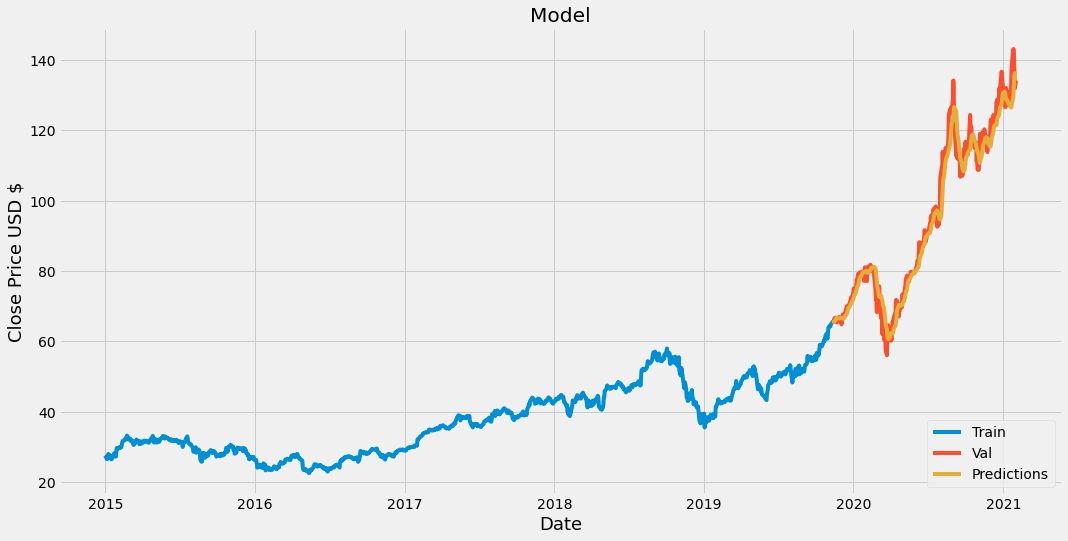

In [49]:
#Plot
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [50]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-11-13,66.117500,65.162682
2019-11-14,65.660004,65.508461
2019-11-15,66.440002,65.768387
2019-11-18,66.775002,66.034920
2019-11-19,66.572502,66.310776
...,...,...
2021-01-26,143.160004,131.309540
2021-01-27,142.059998,133.513229
2021-01-28,137.089996,135.377594


In [51]:
apple_quote =web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-02-01')
new_df = apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert df to an array
last_60_days = new_df[-60:].values
#scale
last_60_days_scaled =scaler.transform(last_60_days)
#create an empty list
X_test = []
#append
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpyarry
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[79.95986]]


In [52]:
apple_quote2 =web.DataReader('AAPL', data_source='yahoo', start='2020-02-01', end='2020-02-01')
print(apple_quote2['Close'])

Date
2020-01-31    77.377502
Name: Close, dtype: float64
